In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
%pip install pypsa[gurobi] "xarray>=2023.8.0" 

Note: you may need to restart the kernel to use updated packages.


In [3]:
from add_country_failure import *

In [4]:
import pypsa
import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import dataclass

In [8]:
add_scandinavia(network, climatic_year, time_horizon_in_hours)

In [9]:
add_germany(network, climatic_year, time_horizon_in_hours)
add_iberian(network, climatic_year, time_horizon_in_hours)
add_poland(network, climatic_year, time_horizon_in_hours)
add_france(network, climatic_year, time_horizon_in_hours)

In [10]:
network.generators

attribute,bus,control,type,p_nom,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,p_set,...,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
scandinaviaGas,Scandinavia,PQ,,5000.0,False,0.0,inf,0.0,1.0,0.0,...,1,1,1,0,NaN,NaN,1.0,1.0,1.0,0.0
scandinaviaBioEnergies,Scandinavia,PQ,,11000.0,False,0.0,inf,0.0,1.0,0.0,...,1,1,1,0,NaN,NaN,1.0,1.0,1.0,0.0
scandinaviaHydroelectric,Scandinavia,PQ,,57000.0,False,0.0,inf,0.0,1.0,0.0,...,1,1,1,0,NaN,NaN,1.0,1.0,1.0,0.0
scandinaviaWind_on_shore,Scandinavia,PQ,,43000.0,False,0.0,inf,0.0,1.0,0.0,...,1,1,1,0,NaN,NaN,1.0,1.0,1.0,0.0
scandinaviaWind_off_shore,Scandinavia,PQ,,17000.0,False,0.0,inf,0.0,1.0,0.0,...,1,1,1,0,NaN,NaN,1.0,1.0,1.0,0.0
scandinaviaNuclear,Scandinavia,PQ,,11000.0,False,0.0,inf,0.0,1.0,0.0,...,24,24,1,0,NaN,NaN,1.0,1.0,1.0,0.0
scandinaviaSolar,Scandinavia,PQ,,19000.0,False,0.0,inf,0.0,1.0,0.0,...,1,1,1,0,NaN,NaN,1.0,1.0,1.0,0.0
scandinaviaFailure,Scandinavia,PQ,,100000.0,False,0.0,inf,0.0,1.0,0.0,...,1,1,1,0,NaN,NaN,1.0,1.0,1.0,0.0
GER-Hydro_ROR,Germany,PQ,,3933.0,False,0.0,inf,0.0,1.0,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0


In [11]:
network

PyPSA Network
Components:
 - Bus: 5
 - Carrier: 19
 - Generator: 44
 - Load: 9
 - StorageUnit: 6
 - Store: 11
Snapshots: 8760

In [12]:
links_list = [
    {"name" : "Link_SCA_Curtailment", "bus0" : "Scandinavia", "bus1" : "Curtailment", "p_nom" : 700000, "efficiency" : 0.95},
    {"name" : "Link_SCA_Germany", "bus0":"Scandinavia", "bus1":"Germany", "p_nom":7415, "efficiency":0.95},
    {"name" : "Link_SCA_Poland", "bus0":"Scandinavia", "bus1":"poland", "p_nom":600, "efficiency":0.95},
    #{"name" : "Link_SCA_Benelux", "bus0":"Scandinavia", "bus1":"Benelux", "p_nom":1400, "efficiency":0.95},
    #{"name" : "Link_Benelux_SCA", "bus0":"Benelux", "bus1":"Scandinavia", "p_nom":1400, "efficiency":0.95},
    {"name" : "Link_Poland_SCA", "bus0":"poland", "bus1":"Scandinavia", "p_nom":600, "efficiency":0.95},
    {"name" : "Link_Germany_SCA", "bus0":"Germany", "bus1":"Scandinavia", "p_nom":2000, "efficiency":0.95},
    {"name" : "Link_France_Germany", "bus0":"France", "bus1":"Germany", "p_nom":3300, "efficiency":0.95},
    {"name" : "Link_Germany_France", "bus0":"Germany", "bus1":"France", "p_nom":3300, "efficiency":0.95},
    {"name" : "Link_Germany_Poland", "bus0":"Germany", "bus1":"poland", "p_nom":3400, "efficiency":0.95},
    {"name" : "Link_Poland_Germany", "bus0":"poland", "bus1":"Germany", "p_nom":3400, "efficiency":0.95},
    #{"name" : "Link_Germany_Benelux", "bus0":"Germany", "bus1":"Benelux", "p_nom":9300, "efficiency":0.95},
    #{"name" : "Link_Benelux_Germany", "bus0":"Benelux", "bus1":"Germany", "p_nom":9300, "efficiency":0.95},
    #{"name" : "Link_Benelux_France", "bus0":"Benelux", "bus1":"France", "p_nom":4680, "efficiency":0.95},
    #{"name" : "Link_France_Benelux", "bus0":"France", "bus1":"Benelux", "p_nom":4680, "efficiency":0.95},
    {"name" : "Link_France_Iberian", "bus0":"France", "bus1":"Iberian_Peninsula", "p_nom":5000, "efficiency":0.95},
    {"name" : "Link_Iberian_France", "bus0":"Iberian_Peninsula", "bus1":"France", "p_nom":5000, "efficiency":0.95},
]

for links in links_list:
    network.add("Link", **links,)

In [13]:
network.plot(
    title="European Electricity Network",
    color_geomap=True,
    jitter=0.3,
)

'network.plot(\n    title="European Electricity Network",\n    color_geomap=True,\n    jitter=0.3,\n)'

In [14]:
result = network.optimize(solver_name="gurobi")
print(result)   

Index(['scandinaviaCurtailment-load', 'iberianCurtailment-load',
       'polandCurtailment-load', 'FranceCurtailment-load'],
      dtype='object', name='Load')
Index(['Link_SCA_Curtailment'], dtype='object', name='Link')
Index(['scandinaviaCurtailment-load', 'iberianCurtailment-load',
       'polandCurtailment-load', 'FranceCurtailment-load'],
      dtype='object', name='Load')
Index(['Link_SCA_Curtailment'], dtype='object', name='Link')
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy.gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2024-11-21


INFO:gurobipy.gurobipy:Academic license - for non-commercial use only - expires 2024-11-21
INFO:linopy.io:Writing objective.
Writing binary variables.: 100%|█████████████████████████████████████████| 3/3 [00:00<00:00, 16.49it/s]
INFO:linopy.io: Writing time: 14.4s


Read LP format model from file /private/var/folders/ms/4_rjwj4n1h1gg3k7zdvmsv5m0000gn/T/linopy-problem-26d45zjz.lp


INFO:gurobipy.gurobipy:Read LP format model from file /private/var/folders/ms/4_rjwj4n1h1gg3k7zdvmsv5m0000gn/T/linopy-problem-26d45zjz.lp


Reading time = 4.53 seconds


INFO:gurobipy.gurobipy:Reading time = 4.53 seconds


obj: 1979765 rows, 1068720 columns, 4037398 nonzeros


INFO:gurobipy.gurobipy:obj: 1979765 rows, 1068720 columns, 4037398 nonzeros


Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[x86])


INFO:gurobipy.gurobipy:Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[x86])


INFO:gurobipy.gurobipy:


CPU model: Intel(R) Core(TM) i5-8259U CPU @ 2.30GHz


INFO:gurobipy.gurobipy:CPU model: Intel(R) Core(TM) i5-8259U CPU @ 2.30GHz


Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy.gurobipy:Thread count: 4 physical cores, 8 logical processors, using up to 8 threads


INFO:gurobipy.gurobipy:


Optimize a model with 1979765 rows, 1068720 columns and 4037398 nonzeros


INFO:gurobipy.gurobipy:Optimize a model with 1979765 rows, 1068720 columns and 4037398 nonzeros


Model fingerprint: 0x28012f80


INFO:gurobipy.gurobipy:Model fingerprint: 0x28012f80


Variable types: 832200 continuous, 236520 integer (236520 binary)


INFO:gurobipy.gurobipy:Variable types: 832200 continuous, 236520 integer (236520 binary)


Coefficient statistics:


INFO:gurobipy.gurobipy:Coefficient statistics:


  Matrix range     [9e-01, 1e+05]


INFO:gurobipy.gurobipy:  Matrix range     [9e-01, 1e+05]


  Objective range  [5e+00, 1e+07]


INFO:gurobipy.gurobipy:  Objective range  [5e+00, 1e+07]


  Bounds range     [1e+00, 1e+00]


INFO:gurobipy.gurobipy:  Bounds range     [1e+00, 1e+00]


  RHS range        [1e+00, 1e+06]


INFO:gurobipy.gurobipy:  RHS range        [1e+00, 1e+06]


Presolve removed 1848709 rows and 771589 columns (presolve time = 5s) ...


INFO:gurobipy.gurobipy:Presolve removed 1848709 rows and 771589 columns (presolve time = 5s) ...


Presolve removed 1851242 rows and 799057 columns (presolve time = 14s) ...


INFO:gurobipy.gurobipy:Presolve removed 1851242 rows and 799057 columns (presolve time = 14s) ...


Presolve removed 1858083 rows and 799057 columns


INFO:gurobipy.gurobipy:Presolve removed 1858083 rows and 799057 columns


Presolve time: 14.23s


INFO:gurobipy.gurobipy:Presolve time: 14.23s


Presolved: 121682 rows, 269663 columns, 993995 nonzeros


INFO:gurobipy.gurobipy:Presolved: 121682 rows, 269663 columns, 993995 nonzeros


Variable types: 227467 continuous, 42196 integer (42079 binary)


INFO:gurobipy.gurobipy:Variable types: 227467 continuous, 42196 integer (42079 binary)


Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy.gurobipy:Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy.gurobipy:Showing barrier log only...


INFO:gurobipy.gurobipy:


Root barrier log...


INFO:gurobipy.gurobipy:Root barrier log...


INFO:gurobipy.gurobipy:


Ordering time: 0.18s


INFO:gurobipy.gurobipy:Ordering time: 0.18s


INFO:gurobipy.gurobipy:


Barrier statistics:


INFO:gurobipy.gurobipy:Barrier statistics:


 AA' NZ     : 1.487e+06


INFO:gurobipy.gurobipy: AA' NZ     : 1.487e+06


 Factor NZ  : 4.782e+06 (roughly 200 MB of memory)


INFO:gurobipy.gurobipy: Factor NZ  : 4.782e+06 (roughly 200 MB of memory)


 Factor Ops : 3.464e+08 (less than 1 second per iteration)


INFO:gurobipy.gurobipy: Factor Ops : 3.464e+08 (less than 1 second per iteration)


 Threads    : 1


INFO:gurobipy.gurobipy: Threads    : 1


INFO:gurobipy.gurobipy:


                  Objective                Residual


INFO:gurobipy.gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy.gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0  -1.84497095e+15 -4.49938289e+18  2.11e+05 1.49e+09  4.02e+13    17s


INFO:gurobipy.gurobipy:   0  -1.84497095e+15 -4.49938289e+18  2.11e+05 1.49e+09  4.02e+13    17s


   1  -4.46330345e+14 -2.26628950e+18  6.52e+04 1.37e+09  1.42e+13    18s


INFO:gurobipy.gurobipy:   1  -4.46330345e+14 -2.26628950e+18  6.52e+04 1.37e+09  1.42e+13    18s


   2   8.26073462e+13 -7.10872501e+17  1.77e+04 1.34e+08  3.70e+12    18s


INFO:gurobipy.gurobipy:   2   8.26073462e+13 -7.10872501e+17  1.77e+04 1.34e+08  3.70e+12    18s


   3   2.48544006e+14 -2.12312520e+17  1.36e+03 2.43e+06  5.05e+11    18s


INFO:gurobipy.gurobipy:   3   2.48544006e+14 -2.12312520e+17  1.36e+03 2.43e+06  5.05e+11    18s


   4   2.38535317e+14 -6.98711198e+16  8.20e+02 2.68e+05  1.68e+11    18s


INFO:gurobipy.gurobipy:   4   2.38535317e+14 -6.98711198e+16  8.20e+02 2.68e+05  1.68e+11    18s


   5   1.17516495e+14 -1.45136876e+16  2.04e+02 7.15e-06  3.20e+10    19s


INFO:gurobipy.gurobipy:   5   1.17516495e+14 -1.45136876e+16  2.04e+02 7.15e-06  3.20e+10    19s


   6   4.48449533e+13 -1.75321404e+15  1.82e+01 6.68e-06  3.49e+09    19s


INFO:gurobipy.gurobipy:   6   4.48449533e+13 -1.75321404e+15  1.82e+01 6.68e-06  3.49e+09    19s


   7   3.15243553e+13 -4.63343137e+14  7.44e+00 4.77e-06  9.75e+08    19s


INFO:gurobipy.gurobipy:   7   3.15243553e+13 -4.63343137e+14  7.44e+00 4.77e-06  9.75e+08    19s


   8   2.49187073e+13 -2.08074439e+14  4.32e+00 5.13e-06  4.62e+08    19s


INFO:gurobipy.gurobipy:   8   2.49187073e+13 -2.08074439e+14  4.32e+00 5.13e-06  4.62e+08    19s


   9   1.93818653e+13 -1.00397650e+14  2.26e+00 4.17e-06  2.35e+08    19s


INFO:gurobipy.gurobipy:   9   1.93818653e+13 -1.00397650e+14  2.26e+00 4.17e-06  2.35e+08    19s


  10   1.63943432e+13 -5.26995298e+13  1.24e+00 3.46e-06  1.33e+08    20s


INFO:gurobipy.gurobipy:  10   1.63943432e+13 -5.26995298e+13  1.24e+00 3.46e-06  1.33e+08    20s


  11   1.47411594e+13 -1.36911577e+13  6.80e-01 3.52e-06  5.45e+07    20s


INFO:gurobipy.gurobipy:  11   1.47411594e+13 -1.36911577e+13  6.80e-01 3.52e-06  5.45e+07    20s


  12   1.38947112e+13  4.08154168e+11  4.15e-01 2.62e-06  2.56e+07    20s


INFO:gurobipy.gurobipy:  12   1.38947112e+13  4.08154168e+11  4.15e-01 2.62e-06  2.56e+07    20s


  13   1.32436237e+13  7.27407429e+12  2.27e-01 1.88e-06  1.11e+07    20s


INFO:gurobipy.gurobipy:  13   1.32436237e+13  7.27407429e+12  2.27e-01 1.88e-06  1.11e+07    20s


  14   1.27578146e+13  9.42039444e+12  1.05e-01 1.99e-06  6.10e+06    20s


INFO:gurobipy.gurobipy:  14   1.27578146e+13  9.42039444e+12  1.05e-01 1.99e-06  6.10e+06    20s


  15   1.24457781e+13  1.14764338e+13  2.93e-02 5.77e-07  1.74e+06    21s


INFO:gurobipy.gurobipy:  15   1.24457781e+13  1.14764338e+13  2.93e-02 5.77e-07  1.74e+06    21s


  16   1.23547605e+13  1.21403508e+13  1.02e-02 3.23e-06  3.87e+05    21s


INFO:gurobipy.gurobipy:  16   1.23547605e+13  1.21403508e+13  1.02e-02 3.23e-06  3.87e+05    21s


  17   1.23189366e+13  1.22392596e+13  3.60e-03 5.70e-07  1.43e+05    22s


INFO:gurobipy.gurobipy:  17   1.23189366e+13  1.22392596e+13  3.60e-03 5.70e-07  1.43e+05    22s


  18   1.23031608e+13  1.22783150e+13  1.34e-03 3.77e-08  4.48e+04    22s


INFO:gurobipy.gurobipy:  18   1.23031608e+13  1.22783150e+13  1.34e-03 3.77e-08  4.48e+04    22s


INFO:gurobipy.gurobipy:


Barrier performed 18 iterations in 21.93 seconds (14.62 work units)


INFO:gurobipy.gurobipy:Barrier performed 18 iterations in 21.93 seconds (14.62 work units)


Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy.gurobipy:Barrier solve interrupted - model solved by another algorithm


INFO:gurobipy.gurobipy:


Concurrent spin time: 0.03s


INFO:gurobipy.gurobipy:Concurrent spin time: 0.03s


INFO:gurobipy.gurobipy:


Solved with dual simplex


INFO:gurobipy.gurobipy:Solved with dual simplex


INFO:gurobipy.gurobipy:


Root simplex log...


INFO:gurobipy.gurobipy:Root simplex log...


INFO:gurobipy.gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy.gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


  102742    1.2291685e+13   0.000000e+00   0.000000e+00     22s


INFO:gurobipy.gurobipy:  102742    1.2291685e+13   0.000000e+00   0.000000e+00     22s


INFO:gurobipy.gurobipy:


Root relaxation: objective 1.229168e+13, 102742 iterations, 6.46 seconds (3.74 work units)


INFO:gurobipy.gurobipy:Root relaxation: objective 1.229168e+13, 102742 iterations, 6.46 seconds (3.74 work units)


INFO:gurobipy.gurobipy:


    Nodes    |    Current Node    |     Objective Bounds      |     Work


INFO:gurobipy.gurobipy:    Nodes    |    Current Node    |     Objective Bounds      |     Work


 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


INFO:gurobipy.gurobipy: Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


INFO:gurobipy.gurobipy:


     0     0 1.2292e+13    0 1369          - 1.2292e+13      -     -   28s


INFO:gurobipy.gurobipy:     0     0 1.2292e+13    0 1369          - 1.2292e+13      -     -   28s


H    0     0                    1.231585e+13 1.2292e+13  0.20%     -   28s


INFO:gurobipy.gurobipy:H    0     0                    1.231585e+13 1.2292e+13  0.20%     -   28s


H    0     0                    1.231555e+13 1.2292e+13  0.19%     -   30s


INFO:gurobipy.gurobipy:H    0     0                    1.231555e+13 1.2292e+13  0.19%     -   30s


     0     0 1.2292e+13    0  306 1.2316e+13 1.2292e+13  0.19%     -   32s


INFO:gurobipy.gurobipy:     0     0 1.2292e+13    0  306 1.2316e+13 1.2292e+13  0.19%     -   32s


H    0     0                    1.229298e+13 1.2292e+13  0.01%     -   33s


INFO:gurobipy.gurobipy:H    0     0                    1.229298e+13 1.2292e+13  0.01%     -   33s


INFO:gurobipy.gurobipy:


Cutting planes:


INFO:gurobipy.gurobipy:Cutting planes:


  Implied bound: 47


INFO:gurobipy.gurobipy:  Implied bound: 47


  MIR: 441


INFO:gurobipy.gurobipy:  MIR: 441


  Flow cover: 741


INFO:gurobipy.gurobipy:  Flow cover: 741


  Relax-and-lift: 221


INFO:gurobipy.gurobipy:  Relax-and-lift: 221


INFO:gurobipy.gurobipy:


Explored 1 nodes (107242 simplex iterations) in 34.07 seconds (24.09 work units)


INFO:gurobipy.gurobipy:Explored 1 nodes (107242 simplex iterations) in 34.07 seconds (24.09 work units)


Thread count was 8 (of 8 available processors)


INFO:gurobipy.gurobipy:Thread count was 8 (of 8 available processors)


INFO:gurobipy.gurobipy:


Solution count 3: 1.2293e+13 1.23156e+13 1.23158e+13 


INFO:gurobipy.gurobipy:Solution count 3: 1.2293e+13 1.23156e+13 1.23158e+13 


INFO:gurobipy.gurobipy:


Optimal solution found (tolerance 1.00e-04)


INFO:gurobipy.gurobipy:Optimal solution found (tolerance 1.00e-04)


Best objective 1.229298401253e+13, best bound 1.229182966681e+13, gap 0.0094%


INFO:gurobipy.gurobipy:Best objective 1.229298401253e+13, best bound 1.229182966681e+13, gap 0.0094%
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 1068720 primals, 0 duals
Objective: 1.23e+13
Solver model: available
Solver message: 2



('ok', 'optimal')


<Axes: xlabel='Generator', ylabel='GW'>

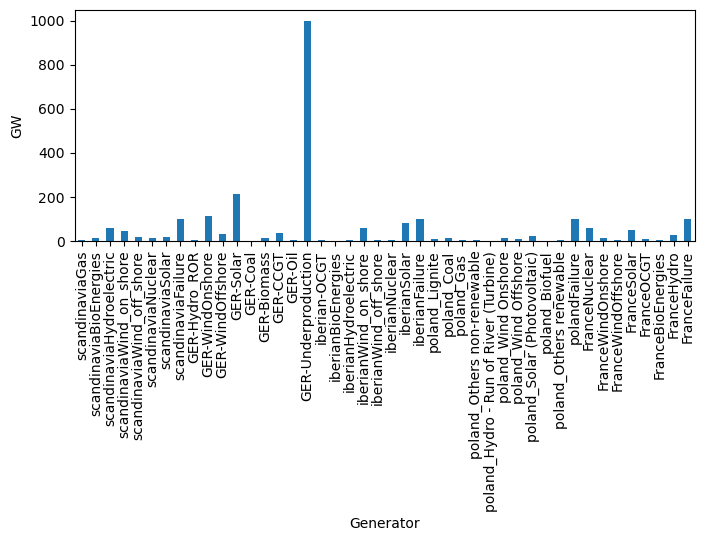

In [15]:
network.generators.p_nom_opt.div(1e3).plot.bar(ylabel="GW", figsize=(8, 3))

<Axes: xlabel='snapshot', ylabel='GW'>

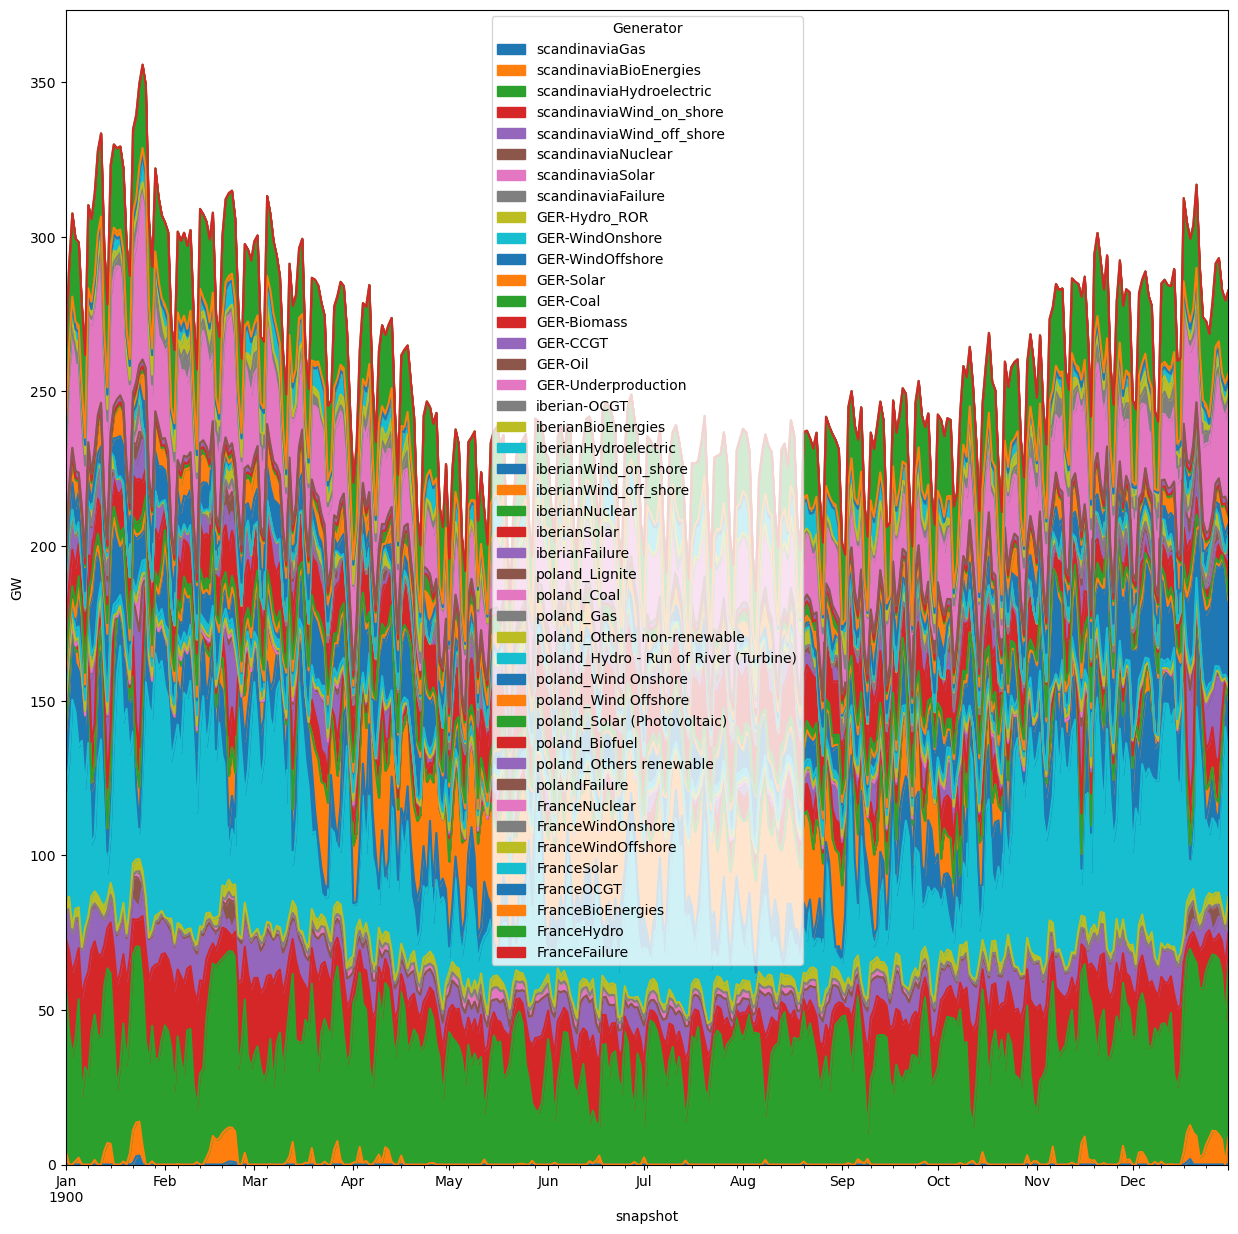

In [16]:
network.generators_t.p['scandinaviaFailure'] = network.generators_t.p['scandinaviaFailure'].clip(lower=0)
network.generators_t.p['GER-Failure'] = network.generators_t.p['GER-Failure'].clip(lower=0)
network.generators_t.p['GER-CCGT'] = network.generators_t.p['GER-CCGT'].clip(lower=0)
network.generators_t.p['iberianFailure'] = network.generators_t.p['iberianFailure'].clip(lower=0)
network.generators_t.p['polandFailure'] = network.generators_t.p['polandFailure'].clip(lower=0)
network.generators_t.p['FranceOCGT'] = network.generators_t.p['FranceOCGT'].clip(lower=0)
network.generators_t.p['FranceFailure'] = network.generators_t.p['FranceFailure'].clip(lower=0)
network.generators_t.p['FranceOCGT'] = network.generators_t.p['FranceOCGT'].clip(lower=0)
network.generators_t.p['FranceOCGT'] = network.generators_t.p['FranceOCGT'].clip(lower=0)

network.generators_t.p.resample('D').mean().div(1e3).plot.area(figsize=(15,15), subplots=False, ylabel="GW")

array([<Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes:

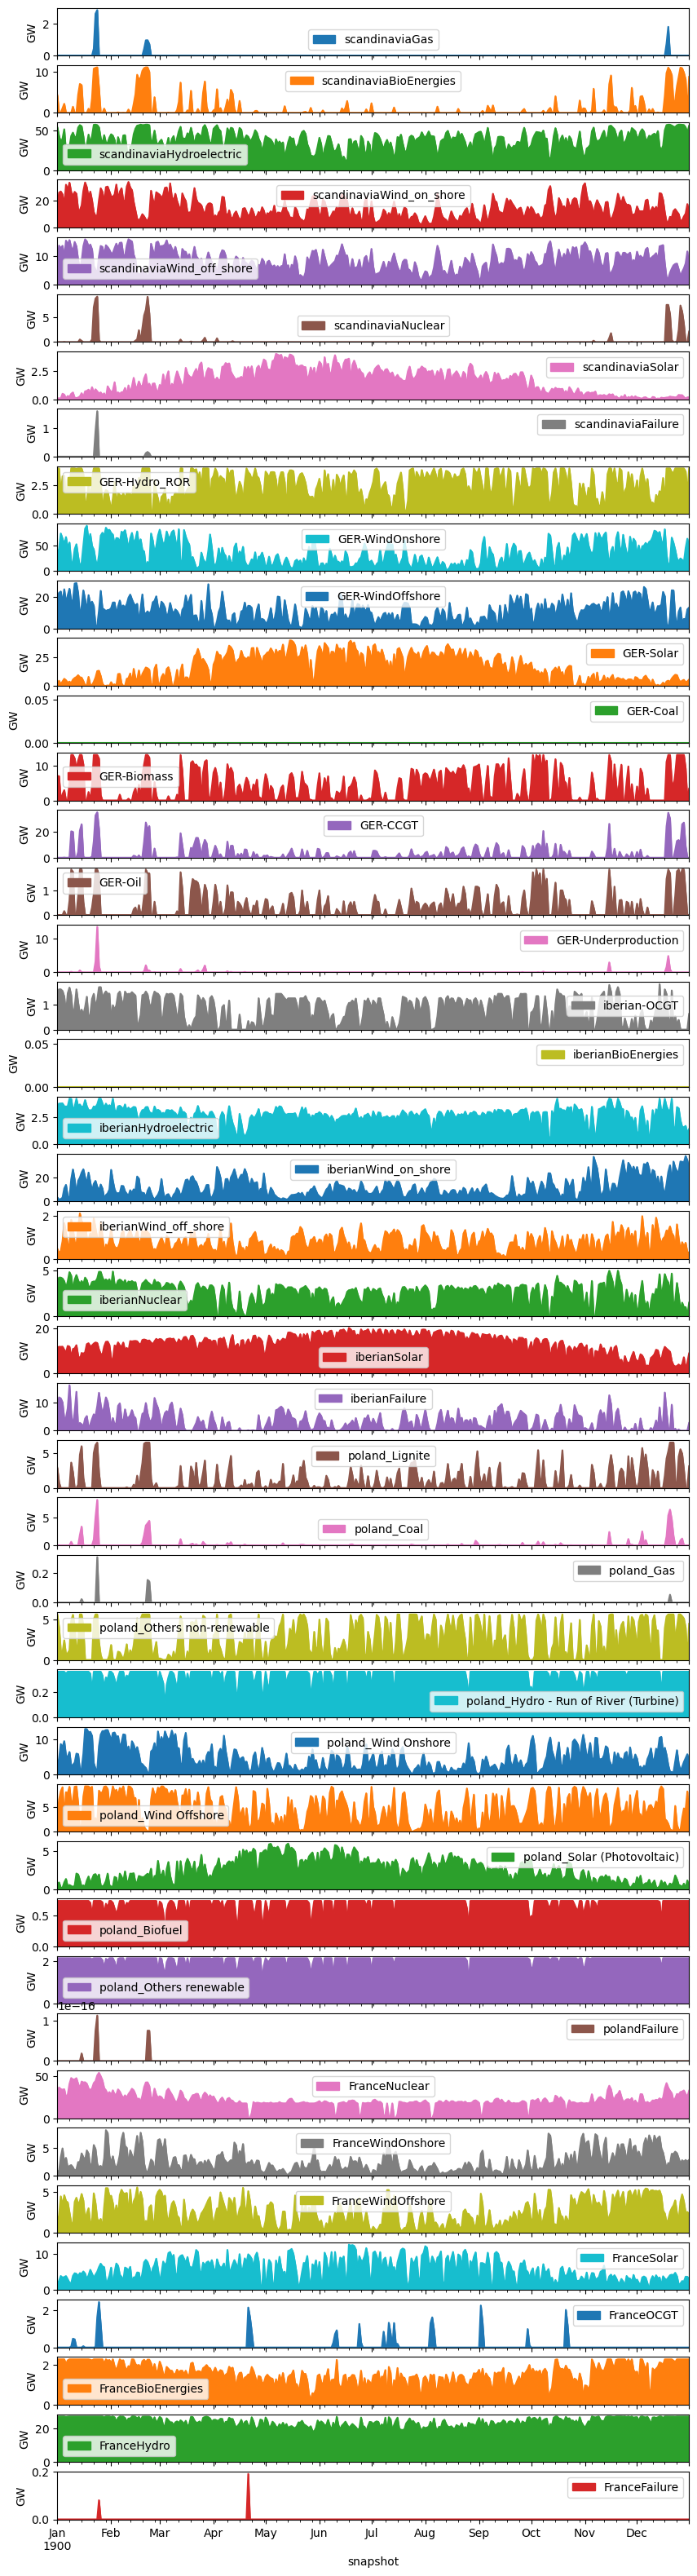

In [17]:
network.generators_t.p.resample('D').mean().div(1e3).plot.area(figsize=(10,40), subplots=True, ylabel="GW")

In [18]:
network.generators.carrier.unique()

array(['Gas', 'BioEnergies', 'Hydro', 'Wind_on_shore', 'Wind_off_shore',
       'Nuclear', 'Solar', 'Failure', 'Wind', 'Coal', 'Biomass', 'Oil',
       'Lignite', 'Others_non_renewable', 'Biofuel', 'Others_renewable',
       'H2'], dtype=object)

<Axes: title={'center': 'European Solar Production'}, xlabel='snapshot', ylabel='GW'>

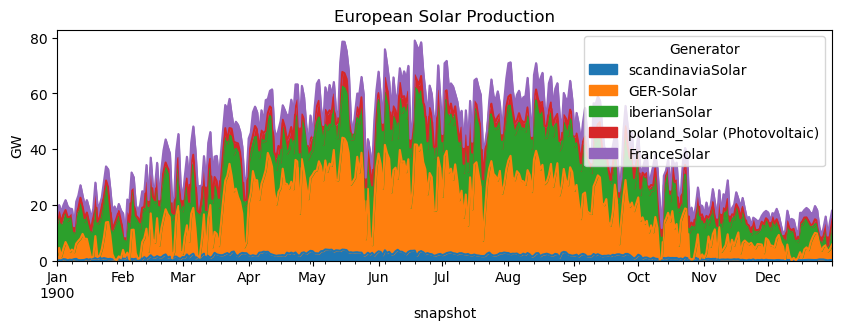

In [19]:
# Afficher production solaire européenne
network.generators_t.p.loc[:, network.generators.carrier == "Solar"].resample("D").mean().div(1e3).plot.area(
    figsize=(10, 3),
    ylabel="GW",
    title="European Solar Production",
)

<Axes: title={'center': 'European Hydro Production'}, xlabel='snapshot', ylabel='GW'>

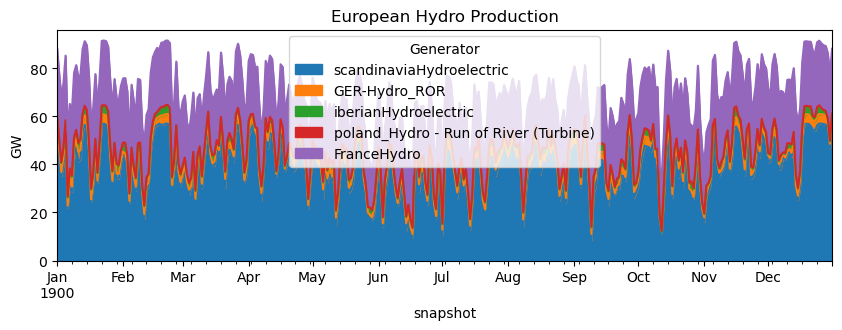

In [20]:
# Afficher production hydro européenne
network.generators_t.p.loc[:, network.generators.carrier == "Hydro"].resample("D").mean().div(1e3).plot.area(
    figsize=(10, 3),
    ylabel="GW",
    title="European Hydro Production",
)

<Axes: title={'center': 'European Wind Production'}, xlabel='snapshot', ylabel='GW'>

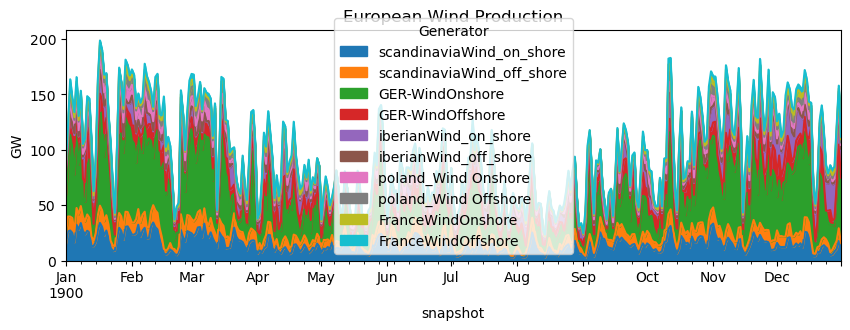

In [21]:
# Afficher production éolienne européenne
list_wind = ["Wind_off_shore", "Wind_on_shore", "Wind"]
network.generators_t.p.loc[:, network.generators.carrier.isin(list_wind)].resample("D").mean().div(1e3).plot.area(
    figsize=(10, 3),
    ylabel="GW",
    title="European Wind Production",
)

<Axes: title={'center': 'European Nuclear Production'}, xlabel='snapshot', ylabel='GW'>

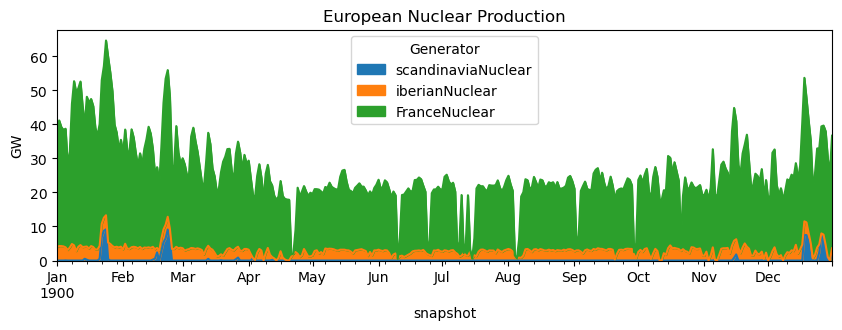

In [22]:
# Afficher production nucléaire européenne
network.generators_t.p.loc[:, network.generators.carrier == "Nuclear"].resample("D").mean().div(1e3).plot.area(
    figsize=(10, 3),
    ylabel="GW",
    title="European Nuclear Production",
)

<Axes: title={'center': 'European Thermal Production'}, xlabel='snapshot', ylabel='GW'>

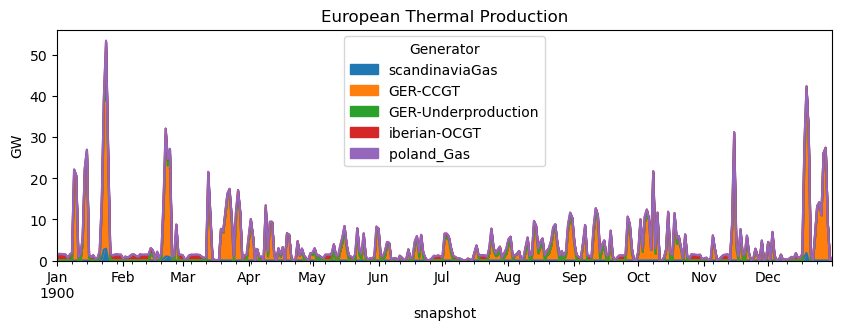

In [23]:
# Afficher production thermique européenne
network.generators_t.p.loc[:, network.generators.carrier == "Gas"].resample("D").mean().div(1e3).plot.area(
    figsize=(10, 3),
    ylabel="GW",
    title="European Thermal Production",
)

<Axes: title={'center': 'European Coal Production'}, xlabel='snapshot', ylabel='GW'>

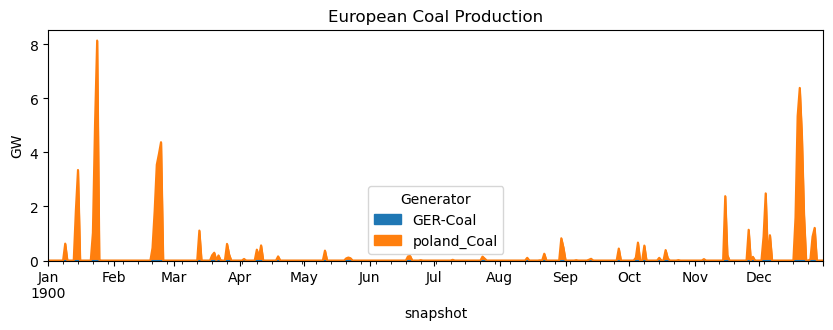

In [24]:
# Afficher production charbon europe
network.generators_t.p.loc[:, network.generators.carrier == "Coal"].resample("D").mean().div(1e3).plot.area(
    figsize=(10, 3),
    ylabel="GW",
    title="European Coal Production",
)

<Axes: title={'center': 'European Failure Production remaining'}, xlabel='snapshot', ylabel='GW'>

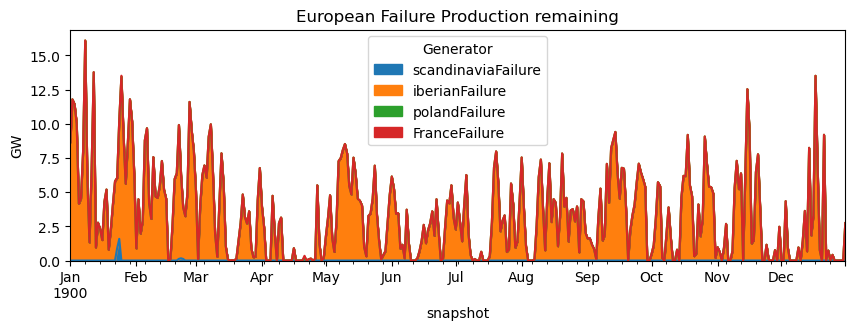

In [28]:
# Afficher remaining failure europe
network.generators_t.p.loc[:, network.generators.carrier == "Failure"].resample("D").mean().div(1e3).plot.area(
    figsize=(10, 3),
    ylabel="GW",
    title="European Failure Production remaining",
)

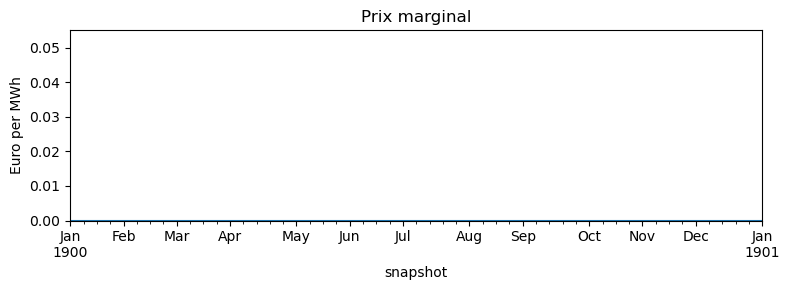

In [25]:
network.buses_t.marginal_price.mean(1).resample('1W').mean().clip(0,20).plot.area(figsize=(8, 3), ylabel="Euro per MWh", title="Prix marginal")
plt.tight_layout()

In [26]:
network.generators

attribute,bus,control,type,p_nom,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,p_set,...,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
scandinaviaGas,Scandinavia,PQ,,5000.0,False,0.0,inf,0.0,1.0,0.0,...,1,1,1,0,NaN,NaN,1.0,1.0,1.0,5000.0
scandinaviaBioEnergies,Scandinavia,PQ,,11000.0,False,0.0,inf,0.0,1.0,0.0,...,1,1,1,0,NaN,NaN,1.0,1.0,1.0,11000.0
scandinaviaHydroelectric,Scandinavia,PQ,,57000.0,False,0.0,inf,0.0,1.0,0.0,...,1,1,1,0,NaN,NaN,1.0,1.0,1.0,57000.0
scandinaviaWind_on_shore,Scandinavia,PQ,,43000.0,False,0.0,inf,0.0,1.0,0.0,...,1,1,1,0,NaN,NaN,1.0,1.0,1.0,43000.0
scandinaviaWind_off_shore,Scandinavia,PQ,,17000.0,False,0.0,inf,0.0,1.0,0.0,...,1,1,1,0,NaN,NaN,1.0,1.0,1.0,17000.0
scandinaviaNuclear,Scandinavia,PQ,,11000.0,False,0.0,inf,0.0,1.0,0.0,...,24,24,1,0,NaN,NaN,1.0,1.0,1.0,11000.0
scandinaviaSolar,Scandinavia,PQ,,19000.0,False,0.0,inf,0.0,1.0,0.0,...,1,1,1,0,NaN,NaN,1.0,1.0,1.0,19000.0
scandinaviaFailure,Scandinavia,PQ,,100000.0,False,0.0,inf,0.0,1.0,0.0,...,1,1,1,0,NaN,NaN,1.0,1.0,1.0,100000.0
GER-Hydro_ROR,Germany,PQ,,3933.0,False,0.0,inf,0.0,1.0,0.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,3933.0


In [27]:
#comparaison avec 2022 ? 
#why failure in Germany doesn't appear ?
#Creating one failure for all EUrope ? 

In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
%pip install pypsa[gurobi] "xarray>=2023.8.0" 

from add_country import *

import pypsa
import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import dataclass

add_scandinavia(network, climatic_year, time_horizon_in_hours)

add_germany(network, climatic_year, time_horizon_in_hours)
add_iberian(network, climatic_year, time_horizon_in_hours)
add_poland(network, climatic_year, time_horizon_in_hours)
add_france(network, climatic_year, time_horizon_in_hours)

network.generators

network

links_list = [
    {"name" : "Link_SCA_Curtailment", "bus0" : "Scandinavia", "bus1" : "Curtailment", "p_nom" : 700000, "efficiency" : 0.95},
    {"name" : "Link_SCA_Germany", "bus0":"Scandinavia", "bus1":"Germany", "p_nom":7415, "efficiency":0.95},
    {"name" : "Link_SCA_Poland", "bus0":"Scandinavia", "bus1":"poland", "p_nom":600, "efficiency":0.95},
    #{"name" : "Link_SCA_Benelux", "bus0":"Scandinavia", "bus1":"Benelux", "p_nom":1400, "efficiency":0.95},
    #{"name" : "Link_Benelux_SCA", "bus0":"Benelux", "bus1":"Scandinavia", "p_nom":1400, "efficiency":0.95},
    {"name" : "Link_Poland_SCA", "bus0":"poland", "bus1":"Scandinavia", "p_nom":600, "efficiency":0.95},
    {"name" : "Link_Germany_SCA", "bus0":"Germany", "bus1":"Scandinavia", "p_nom":2000, "efficiency":0.95},
    {"name" : "Link_France_Germany", "bus0":"France", "bus1":"Germany", "p_nom":3300, "efficiency":0.95},
    {"name" : "Link_Germany_France", "bus0":"Germany", "bus1":"France", "p_nom":3300, "efficiency":0.95},
    {"name" : "Link_Germany_Poland", "bus0":"Germany", "bus1":"poland", "p_nom":3400, "efficiency":0.95},
    {"name" : "Link_Poland_Germany", "bus0":"poland", "bus1":"Germany", "p_nom":3400, "efficiency":0.95},
    #{"name" : "Link_Germany_Benelux", "bus0":"Germany", "bus1":"Benelux", "p_nom":9300, "efficiency":0.95},
    #{"name" : "Link_Benelux_Germany", "bus0":"Benelux", "bus1":"Germany", "p_nom":9300, "efficiency":0.95},
    #{"name" : "Link_Benelux_France", "bus0":"Benelux", "bus1":"France", "p_nom":4680, "efficiency":0.95},
    #{"name" : "Link_France_Benelux", "bus0":"France", "bus1":"Benelux", "p_nom":4680, "efficiency":0.95},
    {"name" : "Link_France_Iberian", "bus0":"France", "bus1":"Iberian_Peninsula", "p_nom":5000, "efficiency":0.95},
    {"name" : "Link_Iberian_France", "bus0":"Iberian_Peninsula", "bus1":"France", "p_nom":5000, "efficiency":0.95},
]

for links in links_list:
    network.add("Link", **links,)

network.plot(
    title="European Electricity Network",
    color_geomap=True,
    jitter=0.3,
)

result = network.optimize(solver_name="gurobi")
print(result)   

network.generators.p_nom_opt.div(1e3).plot.bar(ylabel="GW", figsize=(8, 3))

network.generators_t.p['scandinaviaFailure'] = network.generators_t.p['scandinaviaFailure'].clip(lower=0)
network.generators_t.p['GER-Underproduction'] = network.generators_t.p['GER-Underproduction'].clip(lower=0)
network.generators_t.p['GER-CCGT'] = network.generators_t.p['GER-CCGT'].clip(lower=0)
network.generators_t.p['iberianFailure'] = network.generators_t.p['iberianFailure'].clip(lower=0)
network.generators_t.p['polandFailure'] = network.generators_t.p['polandFailure'].clip(lower=0)
network.generators_t.p['FranceOCGT'] = network.generators_t.p['FranceOCGT'].clip(lower=0)
network.generators_t.p['FranceFailure'] = network.generators_t.p['FranceFailure'].clip(lower=0)
network.generators_t.p['FranceOCGT'] = network.generators_t.p['FranceOCGT'].clip(lower=0)
network.generators_t.p['FranceOCGT'] = network.generators_t.p['FranceOCGT'].clip(lower=0)

network.generators_t.p.resample('D').mean().div(1e3).plot.area(figsize=(15,15), subplots=False, ylabel="GW")

network.generators_t.p.resample('D').mean().div(1e3).plot.area(figsize=(10,40), subplots=True, ylabel="GW")

network.generators.carrier.unique()

# Afficher production solaire européenne
network.generators_t.p.loc[:, network.generators.carrier == "Solar"].resample("D").mean().div(1e3).plot.area(
    figsize=(10, 3),
    ylabel="GW",
    title="European Solar Production",
)

# Afficher production hydro européenne
network.generators_t.p.loc[:, network.generators.carrier == "Hydro"].resample("D").mean().div(1e3).plot.area(
    figsize=(10, 3),
    ylabel="GW",
    title="European Hydro Production",
)

# Afficher production éolienne européenne
list_wind = ["Wind_off_shore", "Wind_on_shore", "Wind"]
network.generators_t.p.loc[:, network.generators.carrier.isin(list_wind)].resample("D").mean().div(1e3).plot.area(
    figsize=(10, 3),
    ylabel="GW",
    title="European Wind Production",
)

# Afficher production nucléaire européenne
network.generators_t.p.loc[:, network.generators.carrier == "Nuclear"].resample("D").mean().div(1e3).plot.area(
    figsize=(10, 3),
    ylabel="GW",
    title="European Nuclear Production",
)

# Afficher production thermique européenne
network.generators_t.p.loc[:, network.generators.carrier == "Gas"].resample("D").mean().div(1e3).plot.area(
    figsize=(10, 3),
    ylabel="GW",
    title="European Thermal Production",
)

# Afficher production charbon europe
network.generators_t.p.loc[:, network.generators.carrier == "Coal"].resample("D").mean().div(1e3).plot.area(
    figsize=(10, 3),
    ylabel="GW",
    title="European Coal Production",
)

# Afficher remaining failure europe
network.generators_t.p.loc[:, network.generators.carrier == "Failure"].resample("D").mean().div(1e3).plot.area(
    figsize=(10, 3),
    ylabel="GW",
    title="European Failure Production remaining",
)

network.buses_t.marginal_price.mean(1).resample('1W').mean().clip(0,20).plot.area(figsize=(8, 3), ylabel="Euro per MWh", title="Prix marginal")
plt.tight_layout()

network.generators

#comparaison avec 2022 ? 
#why failure in Germany doesn't appear ?
#Creating one failure for all EUrope ? 



